In [1]:
import pandas as pd

In [2]:
path='/content/drive/MyDrive/EDA_Project/last3.xlsx'
df2=pd.read_excel(path,sheet_name='genre')
#공백제거
for i in range(len(df2)):
  df2.at[i,'genre']=df2.at[i,'genre'].strip()
len(df2['genre'].unique())

210

In [4]:
li=df2.value_counts()
li=li.drop(['긴장감넘치는','고군분투'])

<ipython-input-4-2538501a44b2>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  li=li.drop(['긴장감넘치는','고군분투'])


In [5]:
#Top 30
end=li[:30]
endlist=[]
for i in end.index:
  endlist.append(i[0])
end

genre
리얼리티     52
버라이어티    44
스릴러      41
범죄       32
로맨스      27
연애       26
코미디      24
액션       23
미스터리     23
서바이벌     17
게임       17
추적       16
다큐멘터리    16
느와르      16
생존       15
판타지      14
여행       14
아이돌      13
토크       13
공포       13
관찰       13
청춘       12
음악       11
학교        9
SF        8
복수        8
스포츠       8
미션        7
성장        7
휴먼        7
dtype: int64

In [6]:
path='/content/drive/MyDrive/EDA_Project/listlast.xlsx'
df=pd.read_excel(path,sheet_name='program')
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [21]:
new_df=df.loc[:,:'genre']

In [7]:
#전체 카운트
for g in endlist:
    for i in range(len(df)):
        s=df.at[i,'genre']
        if g in s:
            df.at[i,g]=1
        else:
            df.at[i,g]=0

In [8]:
df.columns

Index(['code', 'ott', 'title', 'type', 'heart', 'date', 'episode', 'original',
       'actor1', 'actor2', 'genre', 'originals', 'award1', 'award2',
       'bluedragon', 'series', '리얼리티', '버라이어티', '스릴러', '범죄', '로맨스', '연애',
       '코미디', '액션', '미스터리', '서바이벌', '게임', '추적', '다큐멘터리', '느와르', '생존', '판타지',
       '여행', '아이돌', '토크', '공포', '관찰', '청춘', '음악', '학교', 'SF', '복수', '스포츠',
       '미션', '성장', '휴먼'],
      dtype='object')

# 코사인유사도 준비

In [9]:
col1=['리얼리티', '버라이어티', '스릴러', '범죄', '로맨스', '연애',
       '코미디', '액션', '미스터리', '서바이벌', '게임', '추적', '다큐멘터리', '느와르', '생존', '판타지',
       '여행', '아이돌', '토크', '공포', '관찰', '청춘', '음악', '학교', 'SF', '복수', '스포츠',
       '미션', '성장', '휴먼']
data1=df.loc[:,col1]
data1.head()

리얼리티  버라이어티  스릴러   범죄  로맨스   연애  코미디   액션  미스터리  서바이벌  ...   관찰   청춘   음악  \
0   0.0    0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   0.0  ...  0.0  0.0  0.0   
1   0.0    0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0   0.0  ...  0.0  1.0  0.0   
2   0.0    0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0   0.0  ...  0.0  0.0  0.0   
3   0.0    0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0   0.0  ...  0.0  0.0  0.0   
4   0.0    0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   0.0  ...  0.0  0.0  0.0   

    학교   SF   복수  스포츠   미션   성장   휴먼  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 30 columns]

In [13]:
col2=['리얼리티', '버라이어티', '스릴러', '범죄', '로맨스', '연애',
       '코미디', '액션', '미스터리', '서바이벌', '게임', '추적', '다큐멘터리', '느와르', '생존', '판타지',
       '여행', '아이돌', '토크', '공포', '관찰', '청춘', '음악', '학교', 'SF', '복수', '스포츠',
       '미션', '성장', '휴먼','originals','award1','award2','bluedragon','series']
data2=df.loc[:,col2]
data2=data2.fillna(0)

In [11]:
#코사인유사도1
from sklearn.metrics.pairwise import cosine_similarity
cos1=cosine_similarity(data1)
print(cos1.shape)
cos1_sort=cos1.argsort()[:,::-1]

(225, 225)


In [14]:
#코사인유사도2
from sklearn.metrics.pairwise import cosine_similarity
cos2=cosine_similarity(data2)
print(cos2.shape)
cos2_sort=cos2.argsort()[:,::-1]

(225, 225)


# PPT 28. 코사인유사도 그래프

In [15]:
import matplotlib.pyplot as plt

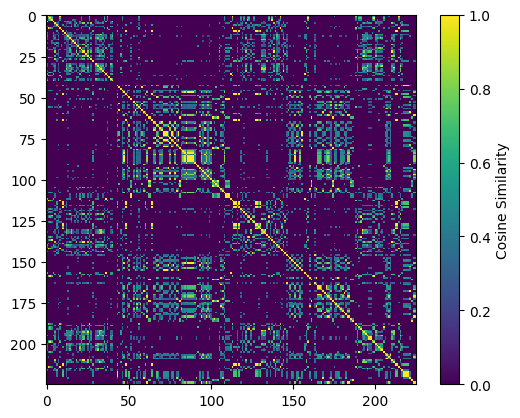

In [16]:
#data1
plt.imshow(cos1, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.show()

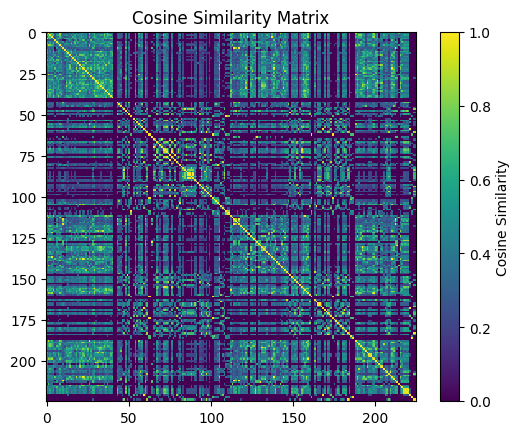

In [17]:
#data2
plt.imshow(cos2, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title('Cosine Similarity Matrix')
plt.show()

# 추천 알고리즘 함수

In [18]:
#유사한 장르를 가진 5개의 프로그램 찾는 함수
def find_sim_program(df,sorted_ind,findtitle,top_n=5):
    index=[]
    title=df[df['title']==findtitle]

    title_index=title.index.values[0]
    similar_index=list(sorted_ind[title_index,:top_n+1])
    if title_index in similar_index:
      similar_index.remove(title_index)
    else:
      similar_index.pop()
    return df.iloc[similar_index]

# PPT 30-31. 드라마 추천

In [22]:
find_sim_program(new_df,cos1_sort,'D.P. 시즌 1')

code      ott      title   type  heart         date episode  \
33     34  Netflix  D.P. 시즌 2  drama   3825   2023.07.28     6부작   
140   141    Tving       아일랜드  drama   1883  2022.12.30.    12부작   
31     32  Netflix       사냥개들  drama   1711  2023.06.09.     8부작   
200   201  disney+    형사록 시즌2  drama    637  2023.07.05.     8부작   
132   133    Tving         괴이  drama   1033  2022.04.29.     6부작   

          original actor1 actor2                               genre  
33    웹툰 D.P 개의 날     정해인    구교환        스릴러, 미스터리, 느와르, 군대, 추적, 사회이슈  
140            NaN    김남길    이다희  공포, 액션, 스릴러, 느와르, 미스터리, 악마, 퇴마, 악령  
31        웹툰 사냥개들     우도환    이상이        액션, 스릴러, 범죄, 느와르, 사채, 추적, 우정  
200            NaN    이성민    경수진           스릴러, 액션, 범죄, 미스터리, 추적, 경찰  
132            NaN    구교환    신현빈              공포, 스릴러, 미스터리, 느와르, 추적

In [23]:
find_sim_program(new_df,cos2_sort,'D.P. 시즌 1')

code      ott        title   type  heart         date episode  \
33     34  Netflix    D.P. 시즌 2  drama   3825   2023.07.28     6부작   
15     16  Netflix      지옥 시즌 1  drama   6725  2021.11.19.     NaN   
200   201  disney+      형사록 시즌2  drama    637  2023.07.05.     8부작   
31     32  Netflix         사냥개들  drama   1711  2023.06.09.     8부작   
192   193  disney+  변론을 시작하겠습니다  drama    970  2022.09.21.    12부작   

             original actor1 actor2                                    genre  
33       웹툰 D.P 개의 날     정해인    구교환             스릴러, 미스터리, 느와르, 군대, 추적, 사회이슈  
15             만화 지옥     유아인    김현주  스릴러, 판타지, 공포, 미스터리, 종교, 추적, 어두운, 긴장감넘치는  
200               NaN    이성민    경수진                스릴러, 액션, 범죄, 미스터리, 추적, 경찰  
31           웹툰 사냥개들     우도환    이상이             액션, 스릴러, 범죄, 느와르, 사채, 추적, 우정  
192   소설 변론을 시작하겠습니다     정려원    이규형                 스릴러, 법정, 미스터리, 추적, 진실과거짓

# PPT 33-34. 예능 추천

In [26]:
find_sim_program(new_df,cos1_sort,'환승연애 3')

code          ott       title           type  heart         date episode  \
224   225  coupangplay       체인리액션  entertainment    210  2022.09.16.     8부작   
223   224  coupangplay        사내연애  entertainment    139  2022.11.11.    10부작   
171   172        Tving      환승연애 2  entertainment   8429  2022.07.15.    20부작   
61     62      Netflix      솔로지옥 3  entertainment   1236  2023.12.12.    10부작   
183   184        Tving  소년 소녀 연애하다  entertainment    464  2023.10.05.    10부작   

    original  actor1 actor2                          genre  
224      NaN     NaN    NaN              리얼리티, 연애, 관찰, 데이트  
223      NaN     NaN    NaN     리얼리티, 연애, 관찰, 오피스, 가상세계/공간  
171      NaN  사이먼도미닉    이용진           리얼리티, 연애, 이별, 재회, 관찰  
61       NaN     홍진경    이다희  리얼리티, 연애, 무인도, 데이트, 관찰, 가슴설레는  
183      NaN     NaN    NaN         리얼리티, 하이틴, 연애, 관찰, 첫사랑

In [27]:
find_sim_program(new_df,cos2_sort,'환승연애 3')

code      ott       title           type  heart         date episode  \
171   172    Tving      환승연애 2  entertainment   8429  2022.07.15.    20부작   
180   181    Tving  결혼과 이혼 사이2  entertainment    219  2023.05.19.    10부작   
151   152    Tving        환승연애  entertainment   5421  2021.06.25.    15부작   
172   173    Tving   러브캐처 인 발리  entertainment    756  2022.11.18.     8부작   
61     62  Netflix      솔로지옥 3  entertainment   1236  2023.12.12.    10부작   

    original  actor1 actor2                          genre  
171      NaN  사이먼도미닉    이용진           리얼리티, 연애, 이별, 재회, 관찰  
180      NaN     김구라    김이나        리얼리티, 결혼, 이혼, 관찰, 고민/사연  
151      NaN  사이먼도미닉    이용진                       리얼리티, 연애  
172      NaN     전현무    장도연           리얼리티, 연애, 심리, 게임, 관찰  
61       NaN     홍진경    이다희  리얼리티, 연애, 무인도, 데이트, 관찰, 가슴설레는